### Gọi thư viện cần thiết

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Chuẩn bị dữ liệu

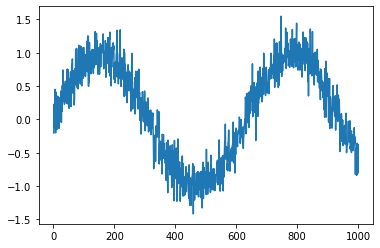

In [2]:
T = 1000
time = np.arange(1, T + 1, dtype=np.float32)
x = np.sin(0.01 * time) + 0.2 * np.random.normal(size=T)

plt.plot(time, x)

In [3]:
tau = 4
features = np.zeros((T-tau, tau))
for i in range(tau):
    features[:, i] = x[i: T-tau+i]
labels = x[tau:]

In [4]:
batch_size, n_train = 16, 600
X_train, y_train = features[:n_train], labels[:n_train]
X_test, y_test = features[n_train:], labels[n_train:]

### Xây dựng và huấn luyện mô hình

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [7]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, linear_model.predict(X_train))

0.050620916920573696

In [8]:
mean_squared_error(y_test, linear_model.predict(X_test))

0.046324165729880566

In [9]:
estimates = linear_model.predict(features)

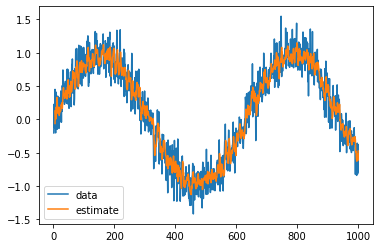

In [10]:
plt.plot(time, x, label='data')
plt.plot(time[tau:], estimates, label='estimate')
plt.legend()
plt.show()

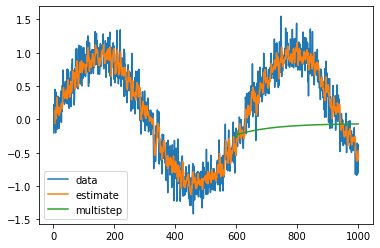

In [11]:
predictions = np.zeros(T)
predictions[:n_train] = x[:n_train]
for i in range(n_train, T):
    predictions[i] = linear_model.predict(predictions[i-tau: i].reshape(1, -1))

plt.plot(time, x, label='data')
plt.plot(time[tau:], estimates, label='estimate')
plt.plot(time[n_train:], predictions[n_train:], label='multistep')
plt.legend()
plt.show()

In [12]:
k = 33

features = np.zeros((k, T-k))
for i in range(tau):
    features[i] = x[i:T-k+i] 

for i in range(tau, k):
    features[i] = linear_model.predict(features[(i-tau):i].T).T

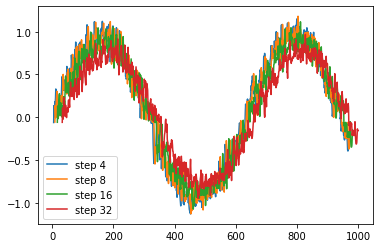

In [13]:
steps = (4, 8, 16, 32)
for i in steps:
    label = 'step {}'.format(i)
    plt.plot(time[i:T-k+i], features[i], label=label)
plt.legend()
plt.show()